## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

## Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
#importing dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the csv files
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Observation:
    1. We see null values in Loan Amount
    2. Three variable are numerical and rest of them are categorical
    3. Loan_ID can be dropped from the dataframe

In [3]:
#Dropping the Loan_ID column:
df.drop('Loan_ID', axis = 1, inplace = True)

In [4]:
df.shape

(614, 12)

In [5]:
#Null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### We have four categorcial columns which have nan values and 3 numeric columns 

In [6]:
#printing brief description of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<AxesSubplot:>

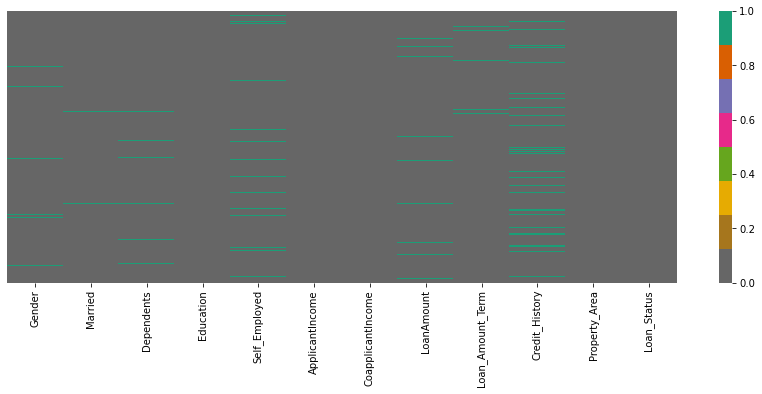

In [7]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'Dark2_r', vmax = 1)

In [8]:
#displaying unique counts and values of columns:
for i in df.columns:
    if df[i].dtypes == object:
        print(str(i) + ':' + str(df[i].unique()))
        print(df[i].value_counts())
        print('Null Count:', df[i].isna().sum())
        print('\n')

Gender:['Male' 'Female' nan]
Male      489
Female    112
Name: Gender, dtype: int64
Null Count: 13


Married:['No' 'Yes' nan]
Yes    398
No     213
Name: Married, dtype: int64
Null Count: 3


Dependents:['0' '1' '2' '3+' nan]
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Null Count: 15


Education:['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Null Count: 0


Self_Employed:['No' 'Yes' nan]
No     500
Yes     82
Name: Self_Employed, dtype: int64
Null Count: 32


Property_Area:['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Null Count: 0


Loan_Status:['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64
Null Count: 0




#### Observation:
    1. The proportion of male is more compared to females
    2. Most of the people have 0 dependents
    3. ~78% are graduate
    4. Over 68% of the applicant is approved loan

In [9]:
#Filling missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [10]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

## Data Analysis & Visualisation

array([<AxesSubplot:ylabel='Loan_Status'>], dtype=object)

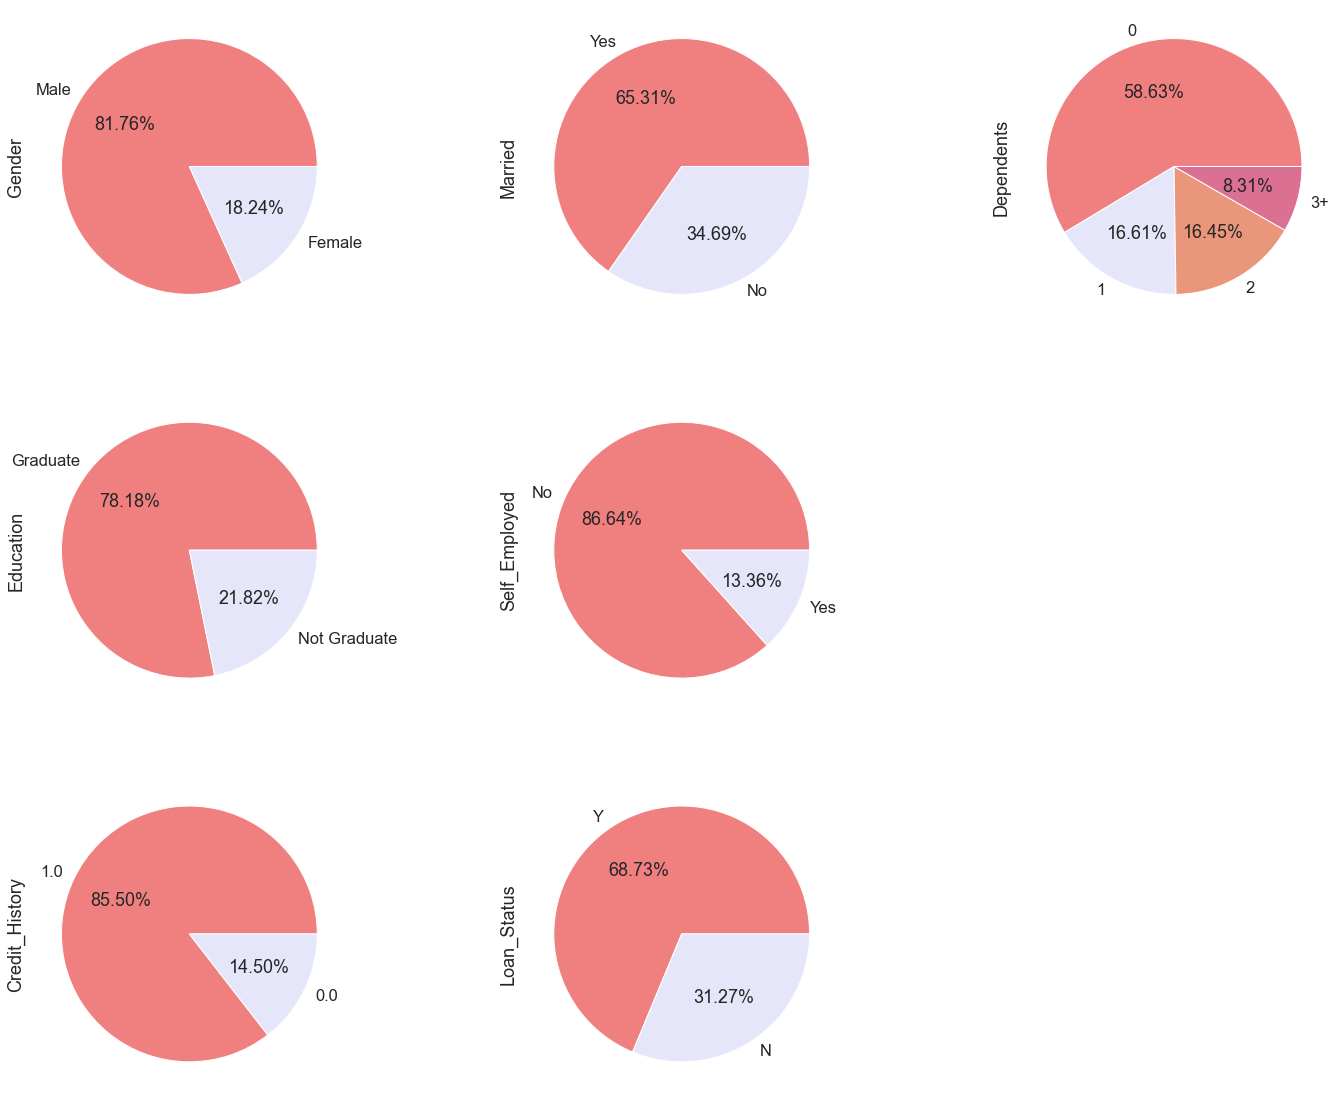

In [11]:
sns.set(style = 'whitegrid', font_scale=1.5)
plt.figure(figsize=(25,20))
plt.subplot(331)
df['Gender'].value_counts().plot(kind='pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct='%.2f%%')
plt.subplot(332)
df['Married'].value_counts().plot(kind='pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct='%.2f%%')
plt.subplot(333)
df['Dependents'].value_counts().plot(kind='pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct='%.2f%%')
plt.subplot(334)
df['Education'].value_counts().plot(kind='pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct='%.2f%%')
plt.subplot(335)
df['Self_Employed'].value_counts().plot(kind='pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct='%.2f%%')
plt.subplot(337)
df['Credit_History'].value_counts().plot(kind='pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct='%.2f%%')
plt.subplot(338)
df['Loan_Status'].value_counts().plot(kind='pie', colors = ['LightCoral','Lavender','DarkSalmon','#DB7093','IndianRed'], subplots=True, autopct='%.2f%%')

#### By looking at the Loan_Status, we can say that the dataset is imbalanced
    

<AxesSubplot:xlabel='Education', ylabel='Count'>

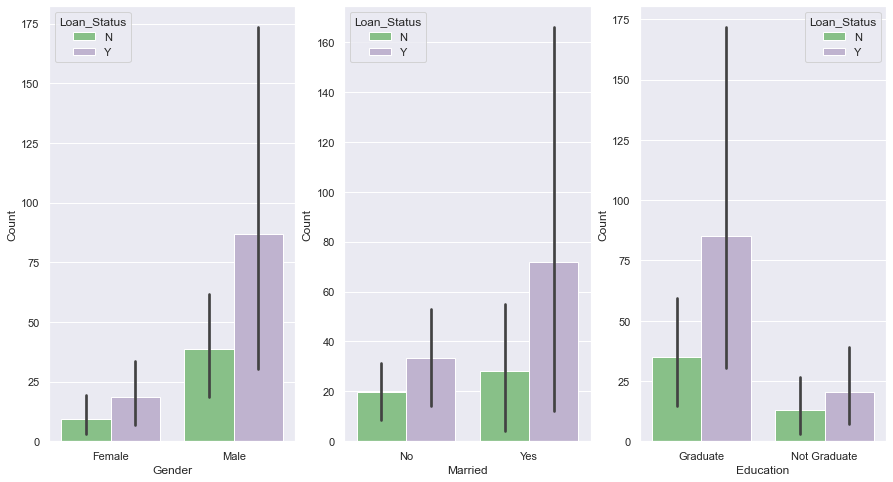

In [12]:
df1 = df.groupby(['Gender','Married', 'Education','Loan_Status']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize': (15,8)})
plt.subplot(131)
sns.barplot(x='Gender',y='Count', hue = 'Loan_Status', data = df1, palette = 'Accent')
plt.subplot(132)
sns.barplot(x='Married', y='Count', hue='Loan_Status', data=df1, palette = 'Accent')
plt.subplot(133)
sns.barplot(x='Education', y='Count',hue='Loan_Status', data=df1, palette='Accent')

#### Observation:
    1. Since the proportion of male is more, loan approval status in male will also be more
    2. Loan approval status is highest for the people who are married
    3. Graduated people have the highest loan approval but its rejection rate is also higher given the fact no. of graduated people is more

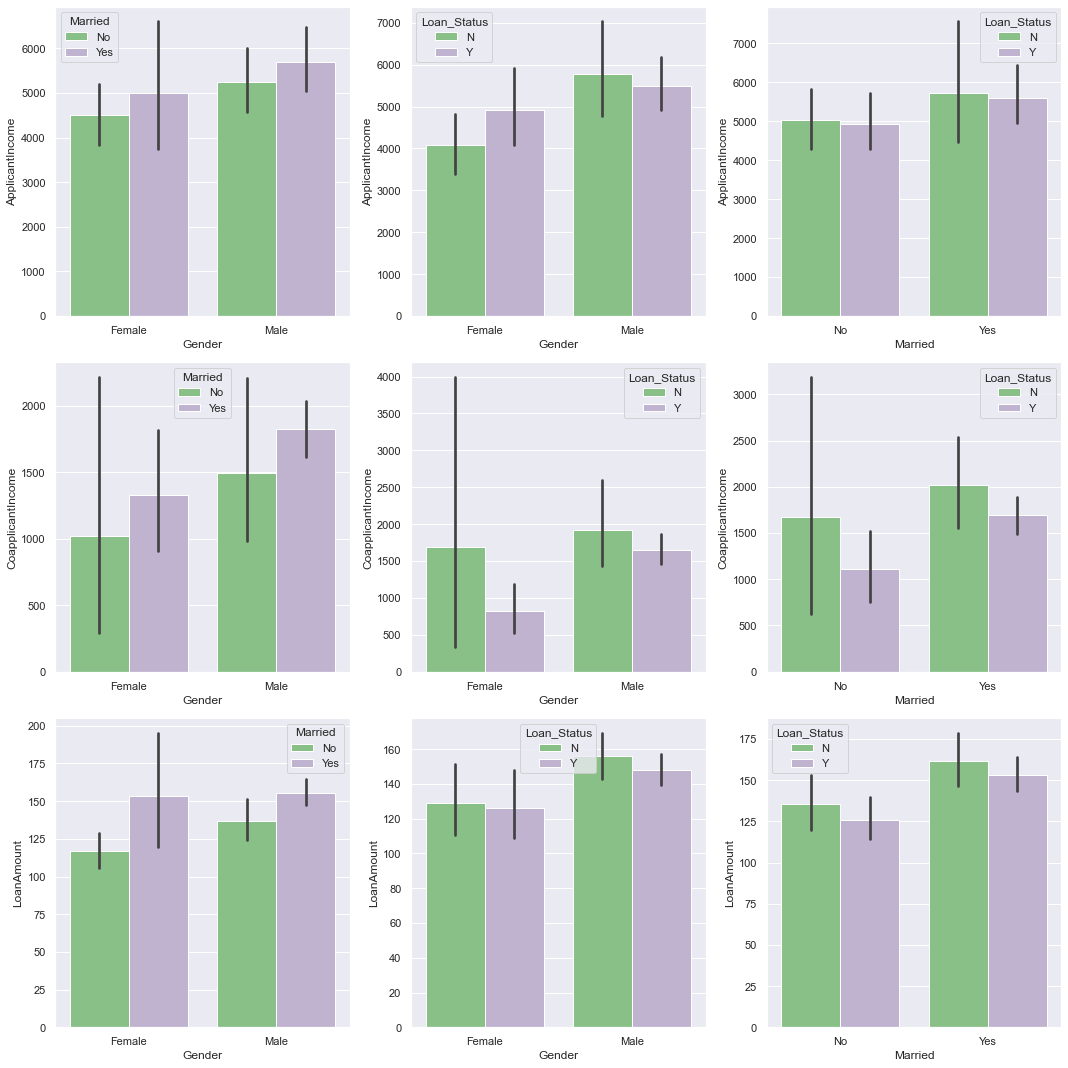

In [13]:
df2 = df.groupby(['Gender','Married','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                  'Loan_Status']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize': (15,15)})
plt.subplot(331)
sns.barplot(x='Gender',y='ApplicantIncome', hue = 'Married', data = df2, palette = 'Accent')
plt.subplot(332)
sns.barplot(x='Gender', y='ApplicantIncome', hue='Loan_Status', data=df2, palette = 'Accent')
plt.subplot(333)
sns.barplot(x='Married', y='ApplicantIncome',hue='Loan_Status', data=df2, palette='Accent')
plt.subplot(334)
sns.barplot(x='Gender', y= 'CoapplicantIncome', hue='Married', data=df2, palette='Accent')
plt.subplot(335)
sns.barplot(x='Gender', y='CoapplicantIncome', hue='Loan_Status', data=df2, palette='Accent')
plt.subplot(336)
sns.barplot(x='Married', y='CoapplicantIncome', hue='Loan_Status', data=df2, palette='Accent')
plt.subplot(337)
sns.barplot(x='Gender', y='LoanAmount',hue='Married', data=df2, palette='Accent')
plt.subplot(338)
sns.barplot(x='Gender', y='LoanAmount',hue='Loan_Status', data=df2, palette='Accent')
plt.subplot(339)
sns.barplot(x='Married',y='LoanAmount', hue='Loan_Status', data=df2, palette='Accent')
plt.tight_layout()

#### Observation:
    1. Generally, people who are married and issued for loan has higher Income while the male whose income is higher is denied of loan
    2. People nominated as coapplicant and lower income are given loan whereas coapplicant having their income higher are denied of loan. Coapplicant disregard of their marriage status, having higher income has hihgher cahnces of getting loan rejected.
    3. Loan amount of non-married female is higher. The loan amount for male is higher compared to their counterparts but having higher loan amount has chances of loan getting rejected.

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

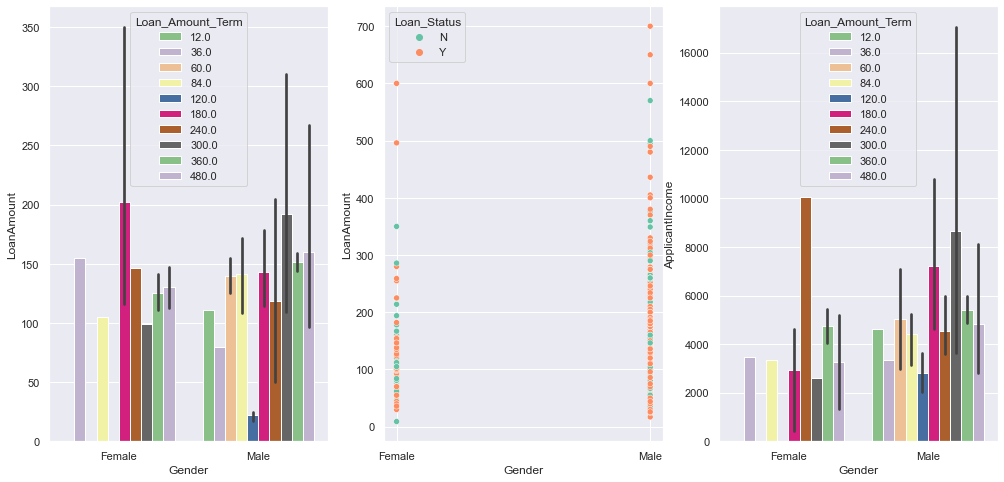

In [14]:
df2 = df.groupby(['Gender','Married','ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount',
                  'Loan_Status']).size().reset_index().rename(columns={0:'Count'})
sns.set(rc={'figure.figsize': (17,8)})
plt.subplot(131)
sns.barplot(x='Gender',y='LoanAmount', hue = 'Loan_Amount_Term', data = df2, palette = 'Accent')
plt.subplot(132)
sns.scatterplot(x='Gender', y='LoanAmount', hue='Loan_Status', data=df2, palette = 'Set2',sizes=1.5)
plt.subplot(133)
sns.barplot(x='Gender', y='ApplicantIncome', hue='Loan_Amount_Term',data=df2, palette='Accent')

#### Observations:
    1. In general, if the loanamount is higher, the term should be bigger to repay the loan, but here no particular trend is observed
    2. In most cases, loan is approved but there is a frequent case of females being disapproved disregard of loanAmount.

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

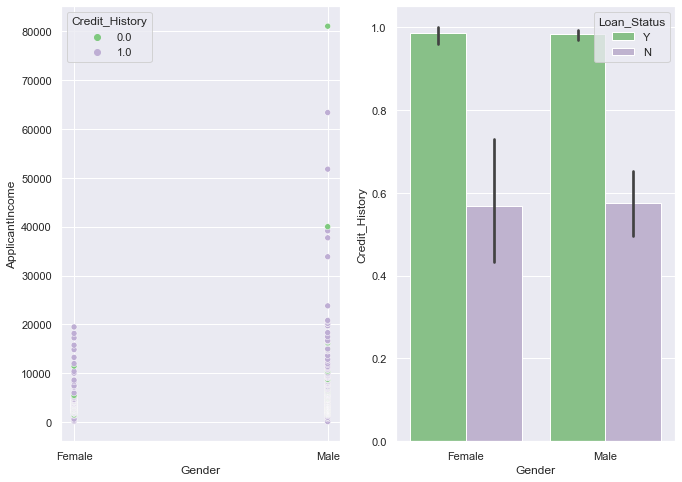

In [15]:
df3 = df.groupby(['Gender','ApplicantIncome','Credit_History', 'LoanAmount',
                  'Loan_Status']).size().reset_index().rename(columns={0:'Count'})
plt.subplot(131)
sns.scatterplot(x='Gender',y='ApplicantIncome',hue='Credit_History',data=df3,palette='Accent')
plt.subplot(132)
sns.barplot(x='Gender',y='Credit_History',hue='Loan_Status',data=df3,palette='Accent')

#### Observation:
    1. Most of the female applicants income is lower than 20000 and have credit History 1.0
    2. Having Credit_History near to one have the probability of getting loan

Text(0.5, 1.0, 'Income vs Property')

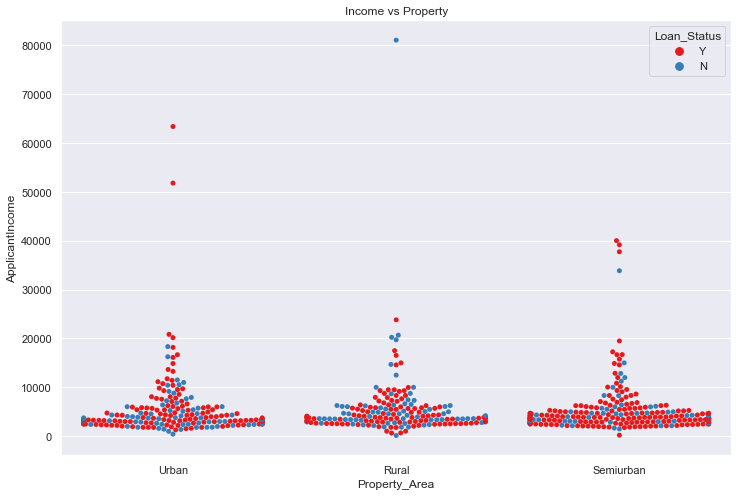

In [16]:
income = df['ApplicantIncome']
area = df['Property_Area']
plt.figure(figsize=(12,8))
sns.swarmplot(area,income,hue='Loan_Status',palette = 'Set1',data =df)
plt.title('Income vs Property')

#### Observation:
    1. Semiurban population has less rejection of loan while Rural people has more rejection ratio for the same income range.
    2. Some outliers can be seen and being the income high, probability of loan disapproval is there

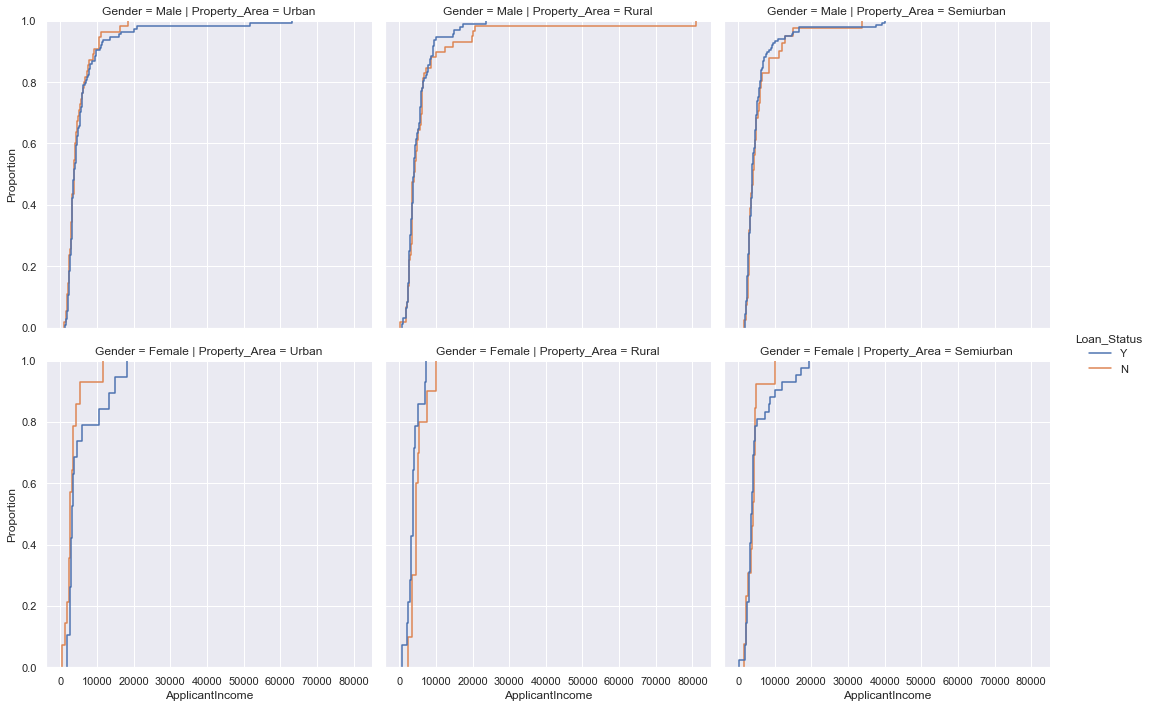

In [17]:
sns.displot(x='ApplicantIncome',data=df,kind='ecdf', hue='Loan_Status',col='Property_Area', row='Gender')

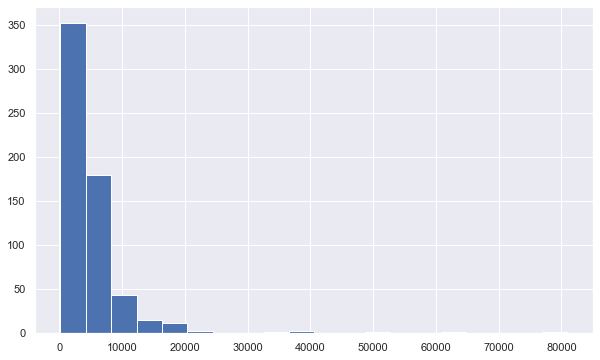

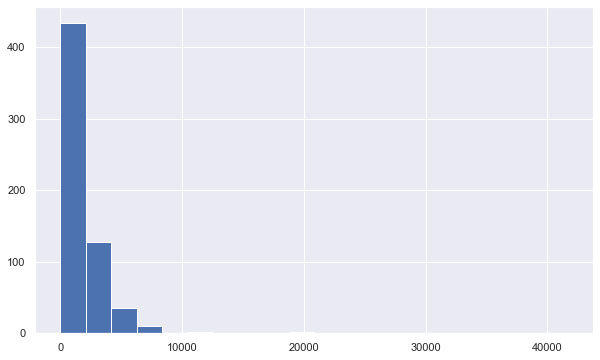

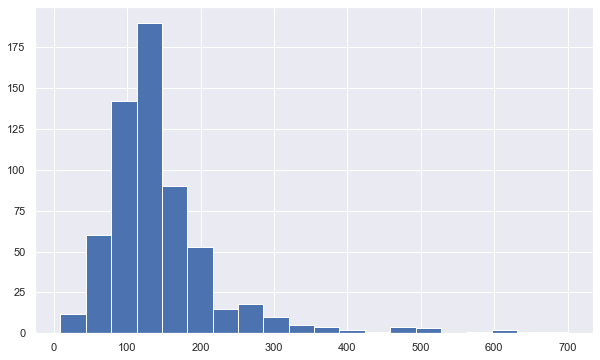

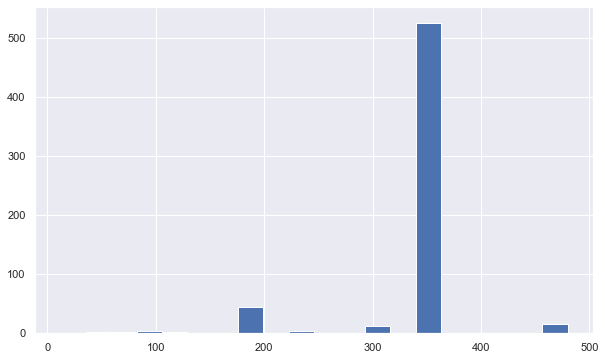

In [18]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in cols:
    plt.figure(figsize=(10,6))
    plt.hist(df[i], bins = 20)
    plt.show()

#### All the numerical features are right skewed and can be fixed by appling log transformation

<AxesSubplot:>

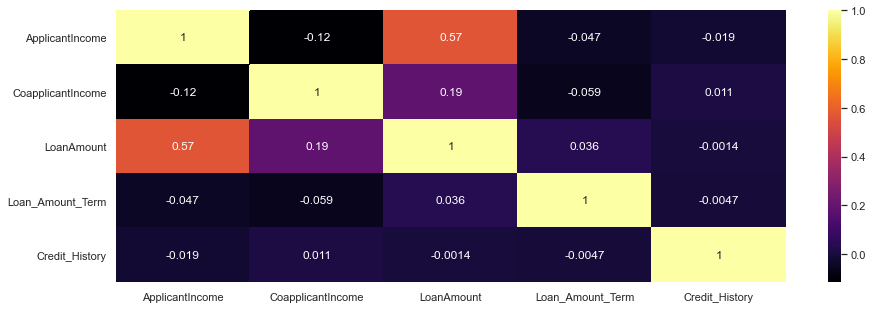

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, cmap = 'inferno', linecolor='black')

#### Observation:
    1. LoanAmount & ApplicantIncome if correlated (50%)
    2. CoapplicantIncome & ApplicantIncome is negatively related (-21%)
    3. LoanAmount & CoapplicantIncome is some positively related at 19%

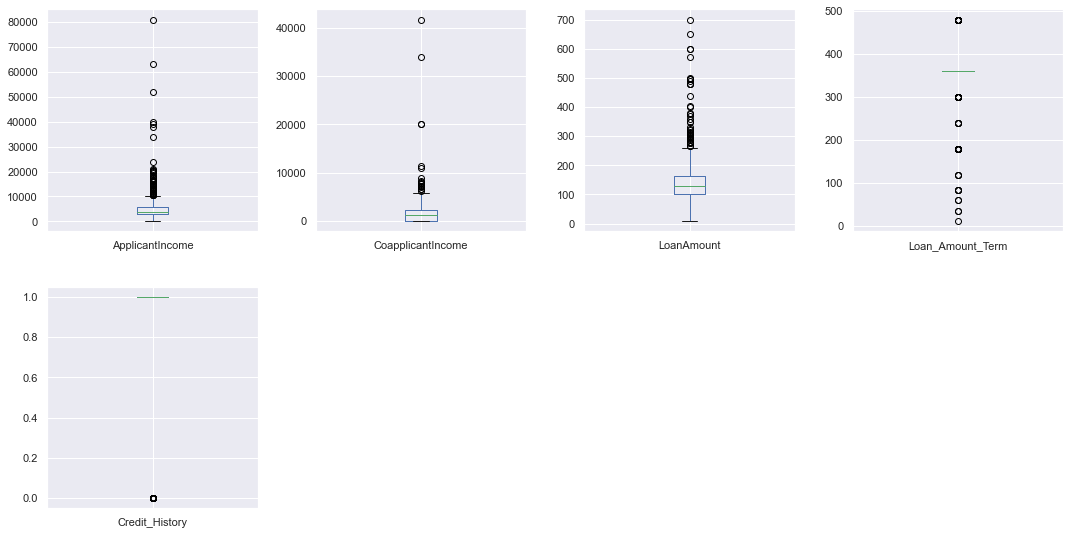

In [20]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.tight_layout(pad=1,w_pad=1.5,h_pad=3)

#### -> LoanAmount & CoapplicanIncome have considerable numbers of outliers 

## Feature Engineering

In [21]:
#Transform categorical variables to numeric features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == np.number:
        continue
    else:
        df[i] = le.fit_transform(df[i])

In [22]:
for i in df.columns:
    if df[i].dtype == int:
        df[i] = df[i].astype(object)

In [25]:
#cheking skewness
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome   -0.173073
LoanAmount          -0.223227
Loan_Amount_Term    -3.181940
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [24]:
#fixing the skewness
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount'] = np.log(df['LoanAmount'])
df['Loan_Amount_Term'] = np.sqrt(df['Loan_Amount_Term'])

### Splitting Dataset 

In [26]:
x= df.drop(['Loan_Status'],axis=1)
Y=df['Loan_Status']

In [27]:
#Scaling the values to one uniform range
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit_transform(x)

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.27871176,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27871176,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.27871176,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27871176,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.27871176,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.27871176,
        -2.42876026, -0.04760721]])

In [28]:
X = pd.DataFrame(x, columns=x.columns)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,376,0.000000,4.986426,18.973666,1.0,2
1,1,1,1,0,0,306,7.319202,4.852030,18.973666,1.0,0
2,1,1,0,0,1,139,0.000000,4.189655,18.973666,1.0,2
3,1,1,0,1,0,90,7.765993,4.787492,18.973666,1.0,2
4,1,0,0,0,0,381,0.000000,4.948760,18.973666,1.0,2


In [61]:
Y=pd.DataFrame(Y)
Y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [88]:
Y=Y.astype('int')

## Building Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score, GridSearchCV

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.20, random_state=0)

In [57]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((491, 11), (123, 11), (491,), (123,))

# Parameter Tuning & Cross validation

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

In [64]:
def cv_score(model):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print('Accuracy on training set: ', model.score(X_train, Y_train))
    print('Accuracy on validation set: ', accuracy_score(Y_test,y_pred))
    
    score = cross_val_score(model,X, Y)
    print('CV score: ', np.mean(score))
    print(confusion_matrix(Y_test,y_pred))
    print(classification_report(Y_test,y_pred))

### Decision Tree Classifier

In [89]:
dtc = DecisionTreeClassifier()
dtc_para = {'criterion': ['gini','entropy'], 
            'splitter':['best','random'],
            'max_depth': [10,20,30,40,50],
            'min_samples_split': [2,4,6,8,10],
            }
dtc_tuning = GridSearchCV(estimator = dtc, param_grid = dtc_para, cv=5, scoring='accuracy',)

dtc_tuning.fit(X,Y)
print(dtc_tuning.best_params_)
print(dtc_tuning.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 6, 'splitter': 'random'}
0.7605890976942555


In [90]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=6, splitter = 'random')
cv_score(dtc)

Accuracy on training set:  0.9065217391304348
Accuracy on validation set:  0.7012987012987013
CV score:  0.7035719045715048
[[31 23]
 [23 77]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        54
           1       0.77      0.77      0.77       100

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



### KNeighbors Classifier

In [94]:
knn = KNeighborsClassifier()
knn_para = {'n_neighbors': list(range(1,10)),
            'weights': ['uniform','distance'],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'metric':['euclidean','minkowski']}
knn_tuning = GridSearchCV(estimator = knn, param_grid = knn_para, cv=5, scoring = 'accuracy')
knn_tuning.fit(X,Y)
print(knn_tuning.best_params_)
print(knn_tuning.best_score_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.6645341863254698


In [96]:
knn = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', n_neighbors = 9, weights = 'uniform')
cv_score(knn)

Accuracy on training set:  0.7152173913043478
Accuracy on validation set:  0.6428571428571429
CV score:  0.6645341863254698
[[ 2 52]
 [ 3 97]]
              precision    recall  f1-score   support

           0       0.40      0.04      0.07        54
           1       0.65      0.97      0.78       100

    accuracy                           0.64       154
   macro avg       0.53      0.50      0.42       154
weighted avg       0.56      0.64      0.53       154



### Random Forest Classifier

In [97]:
rfc = RandomForestClassifier()
rfc_para = {'n_estimators':[100,125,150,200,250],
            'criterion': ['gini','entropy'],
           'max_features': ['auto','sqrt','log2']}
rfc_tuning = GridSearchCV(estimator = rfc, param_grid = rfc_para, cv = 10,scoring = 'accuracy')
rfc_tuning.fit(X,Y)
print(rfc_tuning.best_params_)
print(rfc_tuning.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 125}
0.7965626652564779


In [98]:
rfc = RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt', n_estimators = 125)
cv_score(rfc)

Accuracy on training set:  1.0
Accuracy on validation set:  0.7727272727272727
CV score:  0.7948287351725977
[[24 30]
 [ 5 95]]
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        54
           1       0.76      0.95      0.84       100

    accuracy                           0.77       154
   macro avg       0.79      0.70      0.71       154
weighted avg       0.78      0.77      0.75       154



### SGDClassifier

In [99]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd_para = {'alpha': [1,1e-01,1e-02,1e-03,1e-04,1e-05],
            'penalty':['l2','l1'],
            'learning_rate': ['optimal','constant','invscaling']}
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 10, scoring = 'accuracy')
sgd_tuning.fit(X,Y)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 0.1, 'learning_rate': 'optimal', 'penalty': 'l1'}
0.7083818085668957


In [100]:
sgd = SGDClassifier(alpha = 0.1, learning_rate = 'optimal', penalty = 'l1')
cv_score(sgd)

Accuracy on training set:  0.7
Accuracy on validation set:  0.6493506493506493
CV score:  0.659656137544982
[[  0  54]
 [  0 100]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



### AdaBoost Classifier

In [101]:
from sklearn.ensemble import AdaBoostClassifier
abg = AdaBoostClassifier()
abg_para = {'n_estimators': [100,125,150,175],
            'learning_rate': [1,1.5,2,2.5],
            'random_state': [40,50,60]}
abg_tuning = GridSearchCV(abg, abg_para, cv = 5, scoring = 'accuracy')
abg_tuning.fit(X,Y)
print(abg_tuning.best_params_)
print(abg_tuning.best_score_)

{'learning_rate': 2, 'n_estimators': 125, 'random_state': 40}
0.809462881514061


In [102]:
abg = AdaBoostClassifier(learning_rate = 2, n_estimators = 125, random_state = 40)
cv_score(abg)

Accuracy on training set:  0.8217391304347826
Accuracy on validation set:  0.7727272727272727
CV score:  0.809462881514061
[[21 33]
 [ 2 98]]
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



### Bernoullis NB

In [91]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb_para = {'alpha':[3.0,2.5,2.0,1.5,1.4,1.3,1.3,1.2,1.1,1.0,0.1],
            'fit_prior':[True,False]}
bnb_tuning = GridSearchCV(estimator = bnb, param_grid = bnb_para,cv=5, scoring = 'accuracy', error_score = 'raise')

bnb_tuning.fit(X, Y)
print(bnb_tuning.best_params_)
print(bnb_tuning.best_score_)

{'alpha': 3.0, 'fit_prior': True}
0.809462881514061


In [92]:
bnb = BernoulliNB(alpha=3.0, fit_prior = True)
cv_score(bnb)

Accuracy on training set:  0.8217391304347826
Accuracy on validation set:  0.7727272727272727
CV score:  0.809462881514061
[[21 33]
 [ 2 98]]
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



#### Bernoulli Naive Bayes has the potential to accurately predict the outcomes compared to others

## Saving the model 

In [105]:
import pickle
file = 'Loan_Status.pkl'
pickle.dump(bnb, open(file,'wb'))